<a href="https://colab.research.google.com/github/root-epifit/Graphs/blob/main/Week_2/HW2/hw2-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2, задача 2. Поиск стока или треугольника

В этом ноутбуке требуется в данном *турнире* (ориентированном графе, в котором между каждыми двумя вершинами есть ребро ровно в одну сторону) найти либо сток, либо треугольник (ориентированный цикл на трех вершинах). Для этого можно воспользоваться алгоритмом с занятия, в котором находится сток или цикл. После этого можно найти цикл длины 3.


---
**Правила сдачи.** Это вторая из двух задач домашнего задания 2. Каждая задача оценивается в 5 баллов.

Дедлайн второго домашнего задания --- **22 февраля в 19:00**. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 23 февраля. 

Также можно отправить решения до **19:00 20 февраля**. Тогда они будут проверены до 19:00 21 февраля и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---

In [3]:
# Добавляем библиотеки, определяем функцию для рисования графа

import networkx as nx
import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}

def draw_G(G, axis=False, pos=None):
    options = {
        "font_size": 20,
        "node_size": 1000,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 2,
    }

    if axis:
        plt.axis([0, 8.5, -0.5, 2.7])
    nx.draw_networkx(G, pos, **options)
    plt.show()
    


In [59]:
# В этом блоке находим либо сток, либо цикл, это было реализовано на занятии

def sink(G, v):
    return len(G[v]) == 0


def find_cycle_or_sink(G, v):
    for _ in range(G.number_of_nodes()):
        if sink(G, v):
            return v
        v = list(G[v])[0]
    return v

def build_cycle(G, v):
    cycle = [ v ]
    while list(G[v])[0] != cycle[0]:
        u = list(G[v])[0]
        cycle.append(u)
        v = u
    return cycle


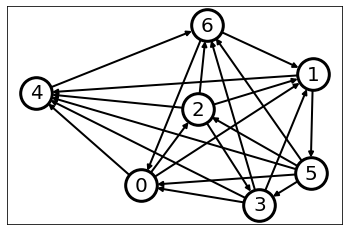

Цикл: [4, 6, 0, 1]
Треугольник: None


In [163]:
# В этом блоке нужно реализовать поиск стока или треугольника

# Здесь задается случайный турнир
n = 7
H = nx.algorithms.tournament.random_tournament(n)
draw_G(H)

# Здесь задается турнир, в котором почти является ациклическим, но ребро из стока в исток развернуто
# Этот турнир может быть полезен для тестирования
#H = nx.DiGraph()
#H.add_nodes_from(range(10))
#for j in H.nodes():
#  for i in range(j):
#    if (i, j) == (0, 9):
#      H.add_edge(j,i)  
#    else:
#      H.add_edge(i,j)


# В этой функции требуется реализовать поиск треугольника по данному циклу
def trim_cycle(G, cycle):
    # Добавьте здесь ваше решение
    pass


# В этой части тестируется решение
v = find_cycle_or_sink(H, n - 1)
if sink(H, v):
    print(f'Сток: {v}')
else:
    cycle = build_cycle(H, v)
    print(f'Цикл: {cycle}')
    print(f'Треугольник: {trim_cycle(H, cycle)}')


In [86]:
v = 0
G=H

In [93]:
for v in cycle:
    print(f"Trying v={v}")
    path=[]
    path.append(v)
    for _ in range(3):
        next_nodes=[i for i in list(G[v]) if i in cycle]
        #print(next_nodes)
        for next_node in next_nodes:
            v = next_node
            path.append(v)
            #print(v)   

Trying v=1
Trying v=0
Trying v=2
Trying v=4


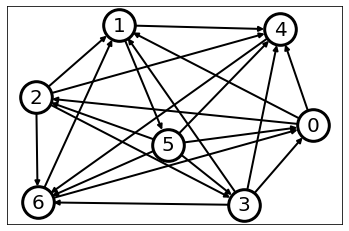

[4, 6, 0, 1]


In [166]:
draw_G(H)
print(cycle)

In [170]:

def init():
    global path, depth, visited, path_found
    path = []
    depth = 0
    visited = {i:False for i in cycle}
    path_found = False  

def explore(G, u, v, cycle=cycle):
    global depth, visited, path_found
    depth = depth + 1
    visited[v] = True
    next_nodes=[i for i in list(G[v]) if i in cycle]
    path_found = u in next_nodes
    print(f"on_enter: depth={depth}, u={u}, v={v}, next_nodes={next_nodes}, path={path}, path_found={path_found}")
    for v in next_nodes:
        if not visited[v] and (not path_found) and (depth <= 2):
            explore(G,u,v,cycle)
    depth = depth -1
    if path_found:
        path.append(v)
    print(f"on_exit: depth={depth}, u={u}, v={v}, path_found={path_found}, path={path}")
    return path_found
            
print(cycle)
for node in cycle[::-1]:
    init()
    explore(H, node, node, cycle)
    if path_found: break
path


[4, 6, 0, 1]
on_enter: depth=1, u=1, v=1, next_nodes=[4], path=[], path_found=False
on_enter: depth=2, u=1, v=4, next_nodes=[6], path=[], path_found=False
on_enter: depth=3, u=1, v=6, next_nodes=[0, 1], path=[], path_found=True
on_exit: depth=2, u=1, v=1, path_found=True, path=[1]
on_exit: depth=1, u=1, v=6, path_found=True, path=[1, 6]
on_exit: depth=0, u=1, v=4, path_found=True, path=[1, 6, 4]


[1, 6, 4]

In [137]:
path[::-1]

[2, 4, 1]

In [50]:
def find_cycle_or_sink(G, v):
    print(f"parameter v={v}")
    for _ in range(G.number_of_nodes()):
        print( f"Cycling: {_}" )
        if sink(G, v):
            return v
        print(list(G[v]))
        v = list(G[v])[0]
        print(v)
    return v

find_cycle_or_sink(H, 4)

parameter v=4
Cycling: 0
[1, 2, 3]
1
Cycling: 1
[0, 2, 3]
0
Cycling: 2
[4]
4
Cycling: 3
[1, 2, 3]
1
Cycling: 4
[0, 2, 3]
0


0

In [32]:
v = 1
G = H
def next_step(v):
    return [i for i in list(G[v]) if i in cycle]

print(f'{next_step(3)}')
#print(f'{step(step(1))}')


[0, 1]


In [43]:
find_cycle_or_sink(H,1)

0

In [29]:
for v in cycle:
    print(f"{v} has_path_to = {[i for i in cycle if nx.has_path(G,v,i)]}")
    print(f"{v} connected_to = {[i for i in list(G[v]) if i in cycle]}")

1 has_path_to = [1, 2, 3, 0]
1 connected_to = [2]
2 has_path_to = [1, 2, 3, 0]
2 connected_to = [3]
3 has_path_to = [1, 2, 3, 0]
3 connected_to = [0, 1]
0 has_path_to = [1, 2, 3, 0]
0 connected_to = [1, 2]


In [16]:
# В этой функции требуется реализовать поиск треугольника по данному циклу
def trim_cycle(G, cycle):
    # Добавьте здесь ваше решение
    pass